<a href="https://colab.research.google.com/github/mlokendra/COMPRESSIVE-STRENGTH-OF-CONCRETE-USING-DEEP-LEARNING/blob/master/Full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data From Google Drive

> Indented block



In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My\ Drive
%cd ./compressive strength of concrete
!ls

Mounted at /content/drive/
/content/drive/My Drive
/content/drive/My Drive/compressive strength of concrete
 ce242.gsheet				 'Lokendra_180383 - Lokendra Meena.pdf'
'concrete_data.csv - concrete_data.csv'  'mse data.gsheet'
 concrete_data.csv.gsheet		 'Reoport 3.gdoc'
 Concrete_Data.xlsx			 'Report 1.gdoc'
'Copy of Full_code.ipynb'		 'Report 2.gdoc'


In [3]:
# libray
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Building ANN As a Regressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

In [4]:
df = pd.read_csv("concrete_data.csv - concrete_data.csv")
df

,Cement (kg/m^3),Blast Furnace Slag (kg/m^3),Fly Ash (kg/m^3),Water (kg/m^3),Superplasticizer (kg/m^3),Coarse Aggregate (kg/m^3),Fine Aggregate (kg/m^3),Age (day),Compressive strength(MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# **NORMALISATION AND PREPROCESSING -:**

*  WCR = water cement ratio
*  FCR = Fine aggregate cement ratio
*   CCR = Coarse Aggregate cement Ratio
*   Binding Ratio





In [49]:
def normalisation(df):  
  df_n=df
  for i in df_n.iloc[0:,0:9]:
      df_n[i]=(df_n[i]-min(df_n[i]))/(max(df_n[i])-min(df_n[i])) 
      #print(i)
  return df_n


def preproccessing_data(df):
  df_new = df.rename(columns={'Cement (kg/m^3)':'Cement',
       'Blast Furnace Slag (kg/m^3)':'BFS',
       'Fly Ash (kg/m^3)':'Fly_Ash',
       'Water  (kg/m^3)':'Water',
       'Superplasticizer (kg/m^3)':'Superplasticizer',
       'Coarse Aggregate  (kg/m^3)':'Coarser_agg',
       'Fine Aggregate (kg/m^3)':'Fine_agg',
       'Age (day)':'Days','Concrete compressive strength(MPa)':'Comp_str'})
  A=df_new['Cement']/df_new['Water']
  df_new['WCR']=A
  A=df_new['Fine_agg']/df_new['Cement']
  df_new['FCR']=A
  A=df_new['Coarser_agg']/df_new['Cement']
  df_new['CCR']=A
  A=df_new['Water']/(df_new['Cement']+df_new['Fly_Ash'])
  df_new['Binder_ratio']=A
  return df_new

In [58]:
df_new =preproccessing_data(df.iloc[0:,0:9])
df_new.head()

,Cement,BFS,Fly_Ash,Water,Superplasticizer,Coarser_agg,Fine_agg,Days,Compressive strength(MPa),WCR,FCR,CCR,Binder_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.333333,1.251852,1.925926,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.333333,1.251852,1.953704,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,1.458333,1.786466,2.803008,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,1.458333,1.786466,2.803008,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.034375,4.156596,4.926485,0.966767


# **Scatter Diagram and Corelation Matrix**


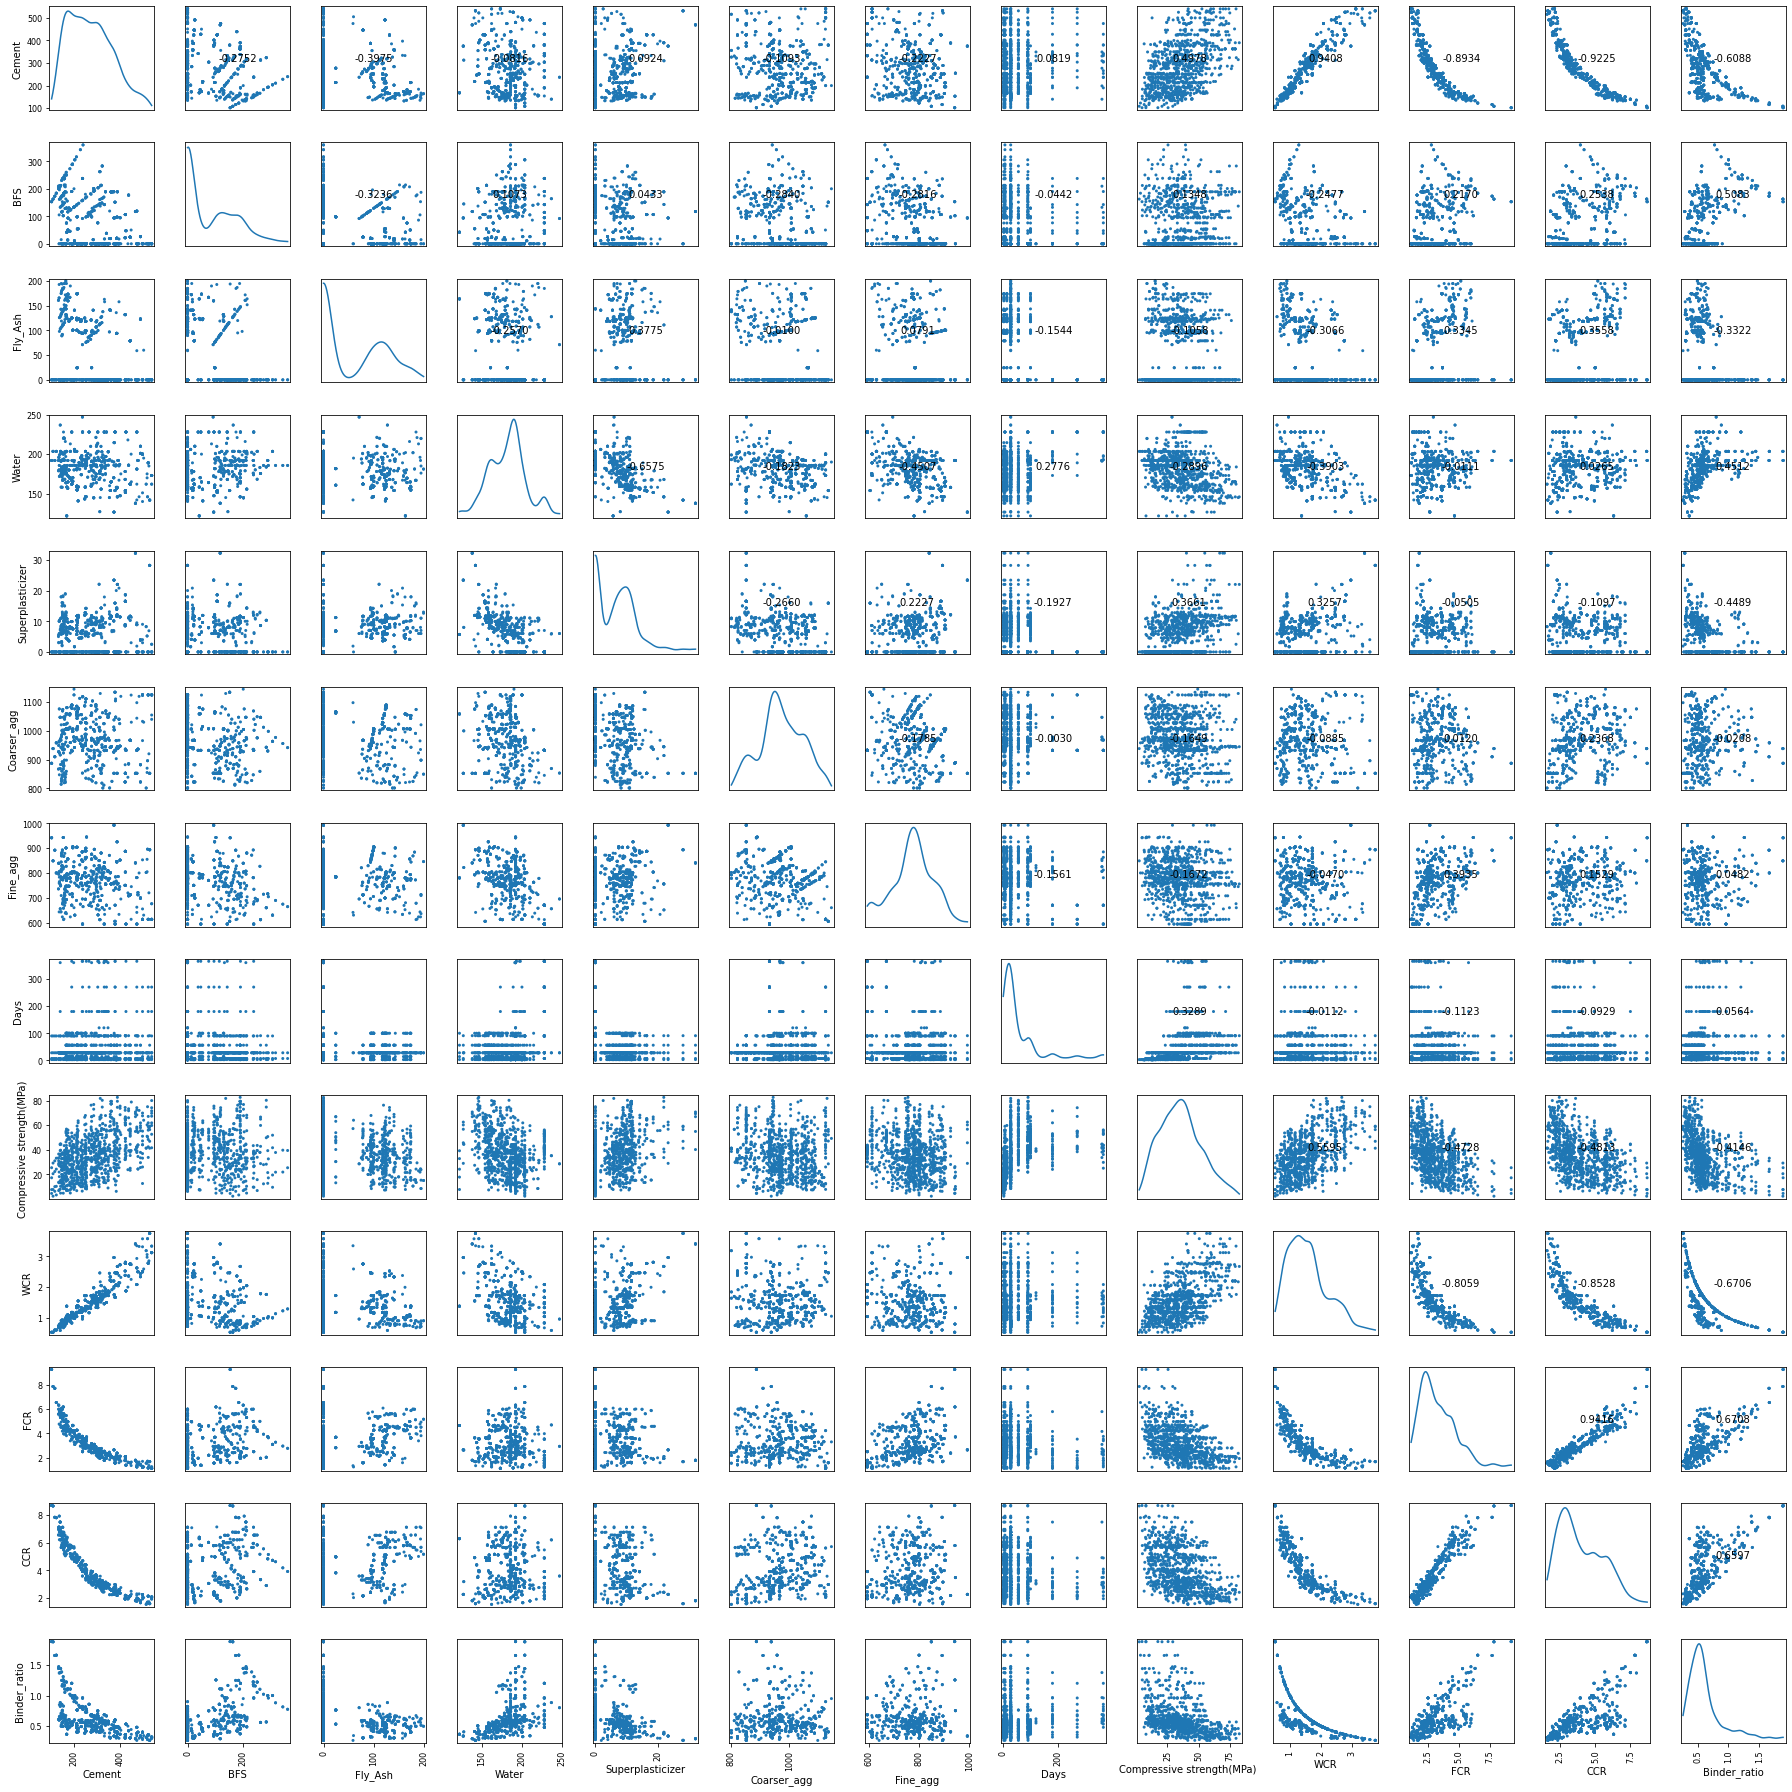

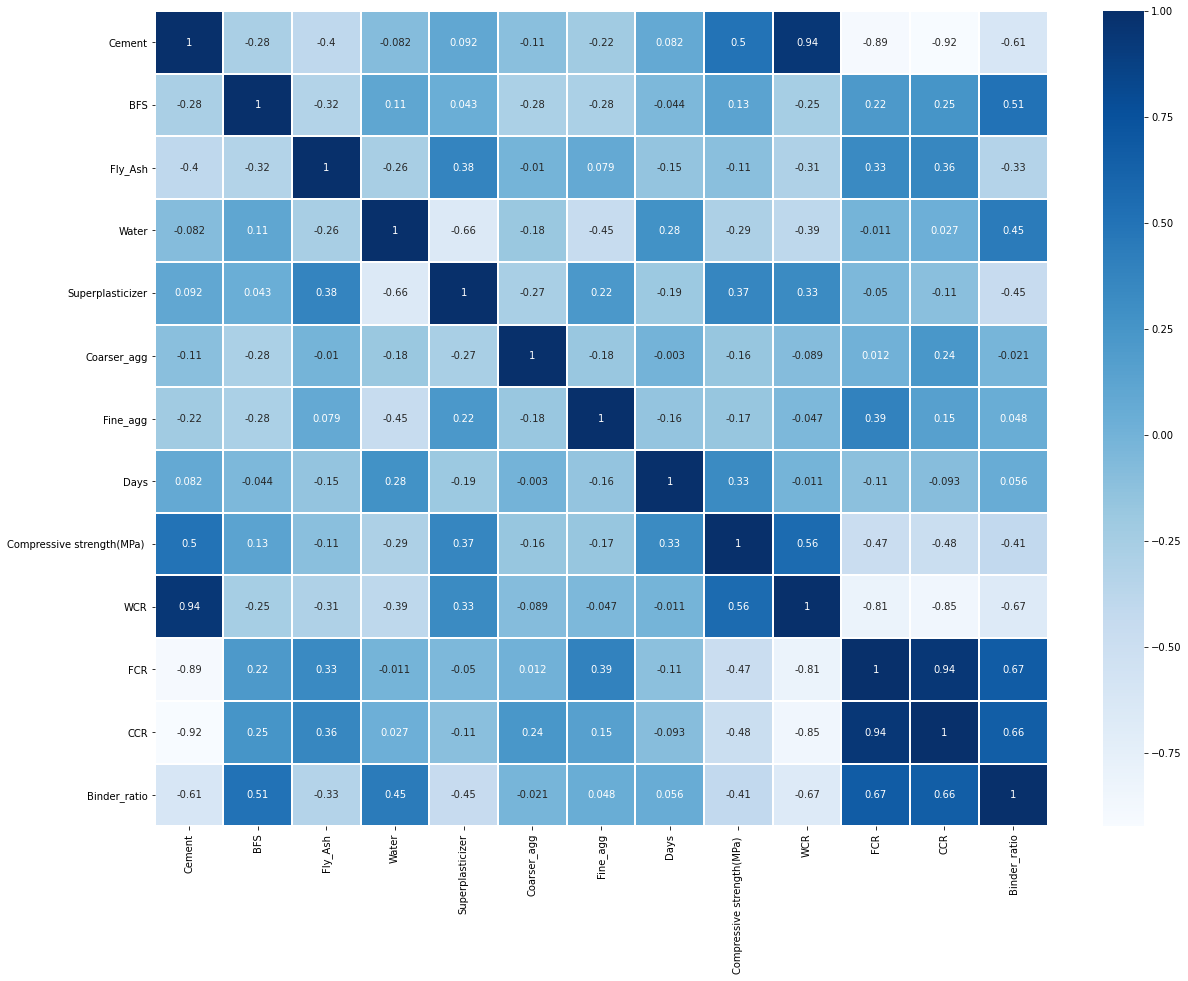

In [30]:
scatterplot_matrix  = pd.plotting.scatter_matrix(df_new, alpha=1.0, figsize=(25, 25), diagonal='kde')
corr = df_new.corr().to_numpy()
for i,j in zip (*plt.np.triu_indices_from(scatterplot_matrix, k=1)):
    scatterplot_matrix[i,j].annotate('%.4f' %corr[i][j], (0.5,0.5), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
plt.show()
import seaborn as sns
corr = df_new.corr() 
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns.heatmap(corr, annot=True, linewidths=1,cmap='Blues',ax=ax)

**EXTRA FEATHERS PLOT CORREELATION GRAPH**

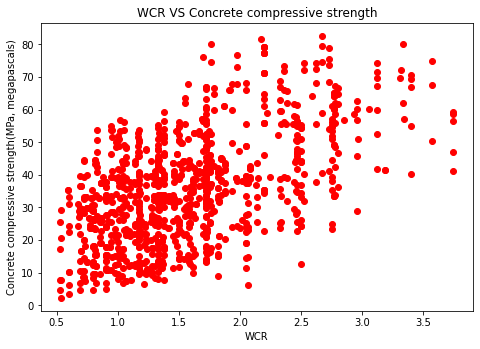

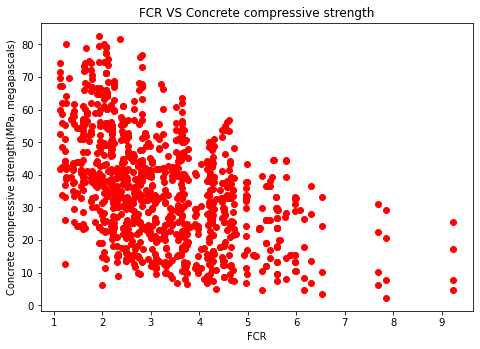

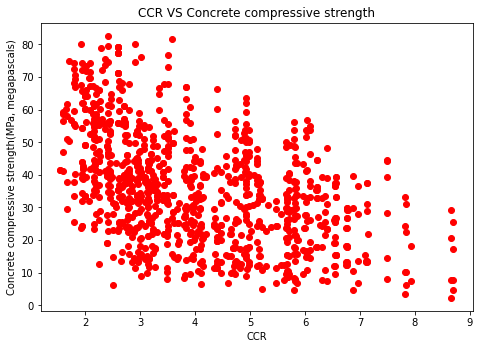

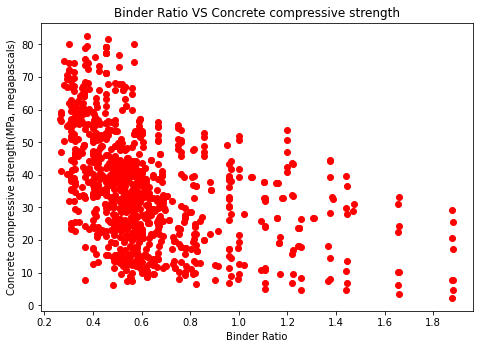

In [59]:
X = df_new['WCR']
Y = df_new['Compressive strength(MPa) ']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X,Y, color='r')
#ax.hist(boys_grades, facecolor='blue', alpha=0.5)
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('WCR')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
ax.set_title('WCR VS Concrete compressive strength')
plt.show()



X = df_new['FCR']
Y = df_new['Compressive strength(MPa) ']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X,Y, color='r')
#ax.hist(boys_grades, facecolor='blue', alpha=0.5)
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('FCR')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
ax.set_title('FCR VS Concrete compressive strength')
plt.show()


X = df_new['CCR']
Y = df_new['Compressive strength(MPa) ']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X,Y, color='r')
#ax.hist(boys_grades, facecolor='blue', alpha=0.5)
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('CCR')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
ax.set_title('CCR VS Concrete compressive strength')
plt.show()



X = df_new['Binder_ratio']
Y = df_new['Compressive strength(MPa) ']

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X,Y, color='r')
#ax.hist(boys_grades, facecolor='blue', alpha=0.5)
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Binder Ratio')
ax.set_ylabel('Concrete compressive strength(MPa, megapascals)')
ax.set_title('Binder Ratio VS Concrete compressive strength')
plt.show()


In [71]:
features = ['Cement', 'BFS', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarser_agg',
       'Fine_agg', 'Days','WCR','FCR','CCR','Binder_ratio']

LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_new[features], df_new['Compressive strength(MPa) '], test_size=0.1, random_state=42)

In [103]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(25, kernel_initializer='normal',input_dim = 12, activation='relu'))
from keras.utils.vis_utils import plot_model
# The Hidden Layers :
NN_model.add(Dense(51, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(207, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(BatchNormalization())
# The Output Layer 
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()
plot_model(NN_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 25)                325       
_________________________________________________________________
dense_67 (Dense)             (None, 51)                1326      
_________________________________________________________________
dense_68 (Dense)             (None, 128)               6656      
_________________________________________________________________
dense_69 (Dense)             (None, 207)               26703     
_________________________________________________________________
dense_70 (Dense)             (None, 256)               53248     
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 257       
Total params: 88,515
Trainable params: 88,515
Non-trainable params: 0
_________________________________________________

In [104]:
history1= NN_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 26.7848 - mean_absolute_error: 26.7848 - val_loss: 14.1487 - val_mean_absolute_error: 14.1487

Epoch 00001: val_loss improved from inf to 14.14868, saving model to Weights-001--14.14868.hdf5
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 15.6286 - mean_absolute_error: 15.6286 - val_loss: 11.9920 - val_mean_absolute_error: 11.9920

Epoch 00002: val_loss improved from 14.14868 to 11.99200, saving model to Weights-002--11.99200.hdf5
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 13.2106 - mean_absolute_error: 13.2106 - val_loss: 11.7475 - val_mean_absolute_error: 11.7475

Epoch 00003: val_loss improved from 11.99200 to 11.74752, saving model to Weights-003--11.74752.hdf5
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 12.3853 - mean_absolute_error: 12.3853 - val_loss: 9.7974 - val_mean_absolute_error: 9.7974

Epoch 00004: val_loss improved 

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
prediction = NN_model.predict(X_test)
r2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_true=y_test, y_pred=prediction)
    
# metrics for true values
# r2 remains unchanged, mse, mea will change and cannot be scaled
# because there is some physical meaning behind it
prediction_true_scale = prediction
y_test_true_scale = y_test
mae_true_scale = mean_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
medae_true_scale = median_absolute_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
mse_true_scale = mean_squared_error(y_true=y_test_true_scale, y_pred=prediction_true_scale)
print(r2,mse,mae,mae_true_scale,medae_true_scale,mse_true_scale  )    

0.8470582317944069 40.67150883721384 4.791397777668481 4.791397777668481 3.727190093994139 40.67150883721384


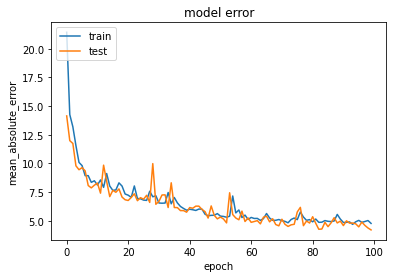

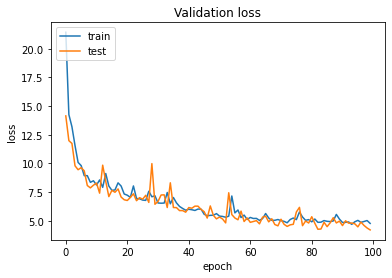

In [106]:
plt.plot(history1.history['mean_absolute_error'])
plt.plot(history1.history['val_loss'])
plt.title('model error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()